In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
hog = pd.read_table('engho2018_hogares.txt', sep='|')

## hogares

### Selección de Columnas

In [4]:
hog.columns

Index(['id', 'provincia', 'region', 'subregion', 'trimestre', 'anio',
       'pondera', 'cv1c04', 'cv1c05_a', 'cv1c05_b',
       ...
       'qinth_t', 'dinth_p', 'dinth_r', 'dinth_t', 'qinpch_p', 'qinpch_r',
       'qinpch_t', 'dinpch_p', 'dinpch_r', 'dinpch_t'],
      dtype='object', length=134)

El dataset contiene 134 columnas de entre las cuales nos limitaremos a:
1. identificacion
    * id
    * provincia

2. ingresos y miembros
    * cantmiem Cantidad de miembros en el hogar
    * cantping Cantidad de perceptores de ingreso
    * reldep Relación de dependencia
    * ingtoth Ingreso total del hogar
    * ingpch Ingreso per cápita del hogar
      

3. gastos
    * gastot Gasto de consumo total del hogar
    * gastotpc Gasto de consumo del hogar per cápit
    * gc_01 Gasto de consumo división 1 - Alimentos y bebidas no alcohólicas
    * gc_02 Gasto de consumo división 2 - Bebidas alcohólicas y tabaco
    * gc_03 Gasto de consumo división 3 - Prendas de vestir y calzado
    * gc_04 Gasto de consumo división 4 - Vivienda, agua, electricidad, gas y otros combustibles
    * gc_05 Gasto de consumo división 5 - Equipamiento y mantenimiento del hogar
    * gc_06 Gasto de consumo división 6 - Salud
    * gc_07 Gasto de consumo división 7 - Transporte
    * gc_08 Gasto de consumo división 8 - Comunicaciones
    * gc_09 Gasto de consumo división 9 - Recreación y cultura
    * gc_10 Gasto de consumo división 10 - Educación
    * gc_11 Gasto de consumo división 11 - Restaurantes y hoteles
    * gc_12 Gasto de consumo división 12 - Bienes y servicios varios

4. formas de pago
    * fp_contado Gasto total de consumo pagado al contado
    * fp_credito Gasto total de consumo en compras pagado con crédito
    * fp_especie Gasto total de consumo recibido en pago por su trabajo o retirado del propio negocio
    * fp_prodprop Gasto total de consumo de productos producidos por el hogar
    * fp_tarjetas Gasto total de consumo pagado con tarjetas prepagas
    * fp_otras Gasto total de consumo con otras formas de pago
    * fp_indef Gasto total de consumo con forma de pago indefinida



In [5]:
cols = ['id', 'provincia', 'cantmiem', 'cantping', 'reldep', 'ingtoth', 'ingpch', 'gastot', 'gastotpc', 'gc_01', 'gc_02', 'gc_03', 'gc_04', 'gc_05', 'gc_06', 'gc_07', 'gc_08', 'gc_09', 'gc_10', 'gc_11', 'gc_12', 'fp_contado', 'fp_credito', 'fp_especie', 'fp_prodprop', 'fp_tarjetas', 'fp_otras', 'fp_indef']

In [6]:
hog = hog[cols].copy()

In [7]:
hog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547 entries, 0 to 21546
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21547 non-null  int64  
 1   provincia    21547 non-null  int64  
 2   cantmiem     21547 non-null  int64  
 3   cantping     21547 non-null  int64  
 4   reldep       21530 non-null  float64
 5   ingtoth      21547 non-null  float64
 6   ingpch       21547 non-null  float64
 7   gastot       21547 non-null  float64
 8   gastotpc     21547 non-null  float64
 9   gc_01        21547 non-null  float64
 10  gc_02        21547 non-null  float64
 11  gc_03        21547 non-null  float64
 12  gc_04        21547 non-null  float64
 13  gc_05        21547 non-null  float64
 14  gc_06        21547 non-null  float64
 15  gc_07        21547 non-null  float64
 16  gc_08        21547 non-null  float64
 17  gc_09        21547 non-null  float64
 18  gc_10        21547 non-null  float64
 19  gc_1

### Valores Faltantes

In [8]:
hog.isna().sum().loc[lambda x: x > 0]

reldep      17
fp_indef     4
dtype: int64

#### reldep

In [9]:
hog[hog.reldep.isna()]

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef
37,864086988,2,1,0,NaN,0.0,0.0,26417.2492,26417.249200,4838.5152,1267.824,280.0,15400.00,216.50,0.0000,712.285,800.000,0.000,0.0,2437.79,464.3350,25704.9642,0.0,0.0,0.0,712.285,0.0,0.0
222,286011624,2,1,0,NaN,0.0,0.0,13823.9400,13823.940000,1428.9000,0.000,0.0,6223.11,2954.23,0.0000,1157.700,300.000,960.000,800.0,0.00,0.0000,13434.2400,0.0,0.0,0.0,389.700,0.0,0.0
268,938679977,2,3,0,NaN,0.0,0.0,35079.8102,11693.270067,4851.9382,0.000,0.0,14300.00,3266.50,2216.6569,707.955,1300.000,1799.000,0.0,4659.08,1978.6801,31971.8552,2400.0,0.0,0.0,707.955,0.0,15840.0
1593,560066184,2,1,0,NaN,0.0,0.0,23643.6241,23643.624100,1393.2641,0.000,0.0,11450.00,0.00,4000.0000,3181.860,2200.000,495.000,0.0,303.10,620.4000,23461.7641,0.0,0.0,0.0,181.860,0.0,30000.0
2413,438657285,6,3,0,NaN,0.0,0.0,7945.7486,2648.582867,2132.1786,753.420,90.0,457.47,551.00,0.0000,1791.600,582.516,1587.564,0.0,0.00,0.0000,5761.9886,1872.0,0.0,0.0,311.760,0.0,19000.0
3263,241266163,6,1,0,NaN,0.0,0.0,0.0000,0.000000,0.0000,0.000,0.0,0.00,0.00,0.0000,0.000,0.000,0.000,0.0,0.00,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,NaN
4467,70468357,6,5,0,NaN,0.0,0.0,12396.6050,2479.321000,6142.1050,0.000,510.0,2400.00,578.71,324.7500,121.240,250.000,1451.000,0.0,0.00,618.8000,12324.6050,72.0,0.0,0.0,0.000,0.0,3000.0
4969,658114954,6,1,0,NaN,0.0,0.0,711.5000,711.500000,0.0000,0.000,0.0,495.00,0.00,0.0000,0.000,216.500,0.000,0.0,0.00,0.0000,711.5000,0.0,0.0,0.0,0.000,0.0,0.0
4991,34476055,6,1,0,NaN,0.0,0.0,5992.0300,5992.030000,0.0000,0.000,0.0,4090.00,150.00,0.0000,0.000,580.000,350.000,0.0,0.00,822.0300,5992.0300,0.0,0.0,0.0,0.000,0.0,0.0
6558,179973257,14,4,0,NaN,0.0,0.0,246.8000,61.700000,0.0000,0.000,0.0,230.80,0.00,0.0000,0.000,0.000,0.000,16.0,0.00,0.0000,246.8000,0.0,0.0,0.0,0.000,0.0,2500.0


In [10]:
hog[hog.cantping == 0].shape

(17, 28)

Estos casos particualres con cantping=0, suponiendo que no se deban a errores, exceden a este análisis, por lo que seran documentados y eliminados del dataset

In [11]:
hog.loc[hog.cantping == 0, 'id'].values

array([864086988, 286011624, 938679977, 560066184, 438657285, 241266163,
        70468357, 658114954,  34476055, 179973257, 652375933, 894320604,
       654676979, 855460549,  18574207, 881871786, 213479475], dtype=int64)

In [12]:
hog.dropna(subset='reldep', inplace=True)

#### fp_indef

In [13]:
hog[hog.fp_indef.isna()]

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef
11906,460972233,38,1,1,1.0,5050.0,5050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
14348,538971768,54,1,1,1.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [14]:
hog.dropna(subset='fp_indef', inplace=True)

In [15]:
hog.isna().sum().any() #any na left

False

### Integridad de Datos

buscamos posibles errores en datos, como valores imposibles (e.g. cant miembros igual a 0) o errores en columnas con relaciones matematicas entre ellas (e.g. gastos, gastos per capita y cantidad de miembros)

In [16]:
hog.head()

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef
0,478229345,2,2,2,1.0,35083.333333,17541.666667,36754.0700,18377.0350,4871.2500,1428.90,0.0,8680.00,0.0,4800.0,2748.480,1725.0,1625.0,0.0,9893.0,982.44,35471.5900,1040.00,0.0,0.0,242.480,0.0,23000.000
1,824935596,2,2,1,2.0,42666.666667,21333.333333,30000.7000,15000.3500,6984.2900,0.00,0.0,7933.00,448.0,9303.2,1593.440,2690.0,750.0,0.0,0.0,298.77,26902.7400,2760.22,0.0,0.0,337.740,0.0,36000.000
2,549385244,2,1,1,1.0,15000.000000,15000.000000,5816.0773,5816.0773,935.3233,0.00,500.0,522.45,50.0,0.0,1411.304,1060.0,600.0,0.0,433.0,304.00,3444.7733,2160.00,0.0,0.0,0.000,0.0,211.304
3,64338930,2,1,1,1.0,65000.000000,65000.000000,33049.6100,33049.6100,4334.3300,913.63,200.0,15000.00,0.0,0.0,368.050,1000.0,3948.5,5000.0,2035.1,250.00,24758.1200,7923.44,0.0,0.0,368.050,0.0,10000.000
4,635779227,2,2,2,1.0,30883.333333,15441.666667,34307.2450,17153.6225,5897.4600,0.00,5450.0,12175.00,1909.8,2000.0,771.005,1384.0,900.0,0.0,2814.5,1005.48,24999.7400,5850.00,2814.5,0.0,643.005,0.0,7500.000


#### Provincia:

In [17]:
cod_prov = [2 + 4 * i for i in range(24)] #codigos de provincias
(~hog.provincia.isin(cod_prov)).any() #algun valor fuera del rango

False

#### Miembros:

In [18]:
print('cantmiem == 0?', (hog.cantmiem == 0).any())
print('rango de valores', [hog.cantmiem.min(), hog.cantmiem.max()])

cantmiem == 0? False
rango de valores [1, 24]


In [19]:
print('cantping == 0?', (hog.cantmiem == 0).any())
print('rango de valores', [hog.cantping.min(), hog.cantping.max()])

cantping == 0? False
rango de valores [1, 11]


In [20]:
print('cantmiem < cantping?', (hog.cantmiem < hog.cantping).any())

cantmiem < cantping? False


In [21]:
print('any reldel != cantmiem / cantping?', 
      (hog.reldep != round(hog.cantmiem / hog.cantping, 2)).any())

any reldel != cantmiem / cantping? True


In [22]:
hog[(hog.reldep != round(hog.cantmiem / hog.cantping, 2))]

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef
12307,113931119,42,9,8,1.13,97050.666667,10783.407407,63304.3415,7033.815722,12640.3958,519.60,1500.0,4019.88,6694.405,2620.0,20132.000,5280.00,6676.00,970.0,0.0,2252.0607,77773.4615,8730.88,0.0,0.0,0.00,0.0,-2600.000
16756,949367217,66,17,8,2.13,46433.333333,2731.372549,31948.6450,1879.332059,20205.9450,0.00,320.0,4556.00,519.600,0.0,1373.350,3433.00,631.45,0.0,909.3,0.0000,31537.2950,0.00,0.0,0.0,411.35,0.0,11680.000
20305,176724365,86,9,8,1.13,45833.333333,5092.592593,18908.2800,2100.920000,10764.3800,454.65,1440.0,2260.00,138.560,389.7,1515.500,844.35,550.00,0.0,0.0,551.1400,18908.2800,0.00,0.0,0.0,0.00,0.0,3000.000
20768,668387936,90,9,8,1.13,36500.003333,4055.555926,16700.8380,1855.648667,6070.6600,216.50,0.0,2115.00,0.000,900.0,3795.678,1533.00,1270.00,800.0,0.0,0.0000,15070.1600,0.00,0.0,0.0,1407.25,0.0,7223.428
20794,788619617,90,9,8,1.13,63400.000000,7044.444444,39386.6020,4376.289111,6456.0300,194.85,7500.0,3100.00,233.200,0.0,16293.370,1280.00,325.00,0.0,2468.1,1536.0520,28056.2320,8780.00,0.0,0.0,2550.37,0.0,12640.000


diferencia en el metodo de redondeo solamente

#### Ingresos:

In [23]:
hog[(hog.ingtoth == 0)]

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef


In [24]:
print('range:', [hog.ingtoth.min(), hog.ingtoth.max()])

range: [125.0, 2461500.0]


In [25]:
print('Any ingresos per capita != ingresos totales / cant. miembros?:', (abs(hog.ingtoth / hog.cantmiem - hog.ingpch) > 0.1).any())

Any ingresos per capita != ingresos totales / cant. miembros?: False


#### Gastos:

In [26]:
cols= ['gastot', 'gc_01', 'gc_02', 'gc_03', 'gc_04', 'gc_05', 'gc_06', 'gc_07', 'gc_08', 'gc_09', 'gc_10', 'gc_11', 'gc_12']
for col in cols:
    print(f'range {col}:', [hog[col].min(), hog[col].max()])

range gastot: [-15283.61, 374616.664]
range gc_01: [0.0, 57726.7373]
range gc_02: [0.0, 51054.4671]
range gc_03: [0.0, 53600.0]
range gc_04: [0.0, 70785.5]
range gc_05: [0.0, 55259.2179]
range gc_06: [0.0, 181623.1005]
range gc_07: [-51090.7, 104920.0]
range gc_08: [0.0, 14475.0]
range gc_09: [0.0, 254739.0]
range gc_10: [0.0, 76880.0]
range gc_11: [0.0, 41470.25]
range gc_12: [0.0, 76285.7]


##### valores negativos

In [27]:
hog[hog.gastot <= 0]

,id,provincia,cantmiem,cantping,reldep,ingtoth,ingpch,gastot,gastotpc,gc_01,gc_02,gc_03,gc_04,gc_05,gc_06,gc_07,gc_08,gc_09,gc_10,gc_11,gc_12,fp_contado,fp_credito,fp_especie,fp_prodprop,fp_tarjetas,fp_otras,fp_indef
36,453346692,2,1,1,1.00,44000.000000,44000.000000,-9529.8100,-9529.810000,7893.5900,0.00,2000.0,20400.00,1500.00,0.0,-51090.700,1800.00,4566.20,0.0,2403.15,997.9500,35691.4100,6666.20,0.0,0.0,112.58,0.0,-27000.000
2437,83561620,6,4,1,4.00,47000.000000,11750.000000,-1285.8100,-321.452500,2165.0000,0.00,2580.0,2201.29,48.00,129.9,-13095.030,1962.30,2063.54,0.0,519.60,139.5900,10369.3800,1439.84,0.0,0.0,904.97,0.0,-500.000
5887,625913172,10,4,3,1.33,20250.000000,5062.500000,-4702.9400,-1175.735000,3732.4600,0.00,0.0,1090.00,0.00,1390.0,-12451.500,1103.10,0.00,0.0,433.00,0.0000,9697.0600,0.00,0.0,0.0,0.00,0.0,-14400.000
7354,424310884,14,2,2,1.00,42000.000000,21000.000000,-5550.4228,-2775.211400,4352.4294,0.00,0.0,2574.00,565.64,0.0,-15990.400,1515.00,585.00,0.0,0.00,847.9078,9649.5772,800.00,0.0,0.0,0.00,0.0,16450.000
12104,18956898,42,1,1,1.00,21125.000000,21125.000000,-10580.5900,-10580.590000,0.0000,0.00,0.0,1839.51,0.00,0.0,-13900.800,605.98,353.92,0.0,0.00,520.8000,3819.4100,0.00,0.0,0.0,0.00,0.0,-2400.000
12432,481692680,42,1,1,1.00,20000.000000,20000.000000,-15283.6100,-15283.610000,5317.2400,368.05,0.0,3294.00,410.00,0.0,-30754.500,1430.00,2400.00,0.0,2251.60,0.0000,22796.3900,1920.00,0.0,0.0,0.00,0.0,-27000.000
13542,599190029,50,3,3,1.00,9666.666667,3222.222222,-7174.1500,-2391.383333,6620.5700,1983.14,9300.0,0.00,519.60,2000.0,-36691.880,2680.00,1700.00,1140.0,2598.00,976.4200,23335.3300,9300.00,0.0,0.0,190.52,0.0,-19000.000
14049,829197459,50,1,1,1.00,11466.666667,11466.666667,-3543.8820,-3543.882000,606.2000,0.00,0.0,691.50,0.00,208.0,-8206.000,1150.00,1170.00,0.0,346.40,490.0180,6056.1180,0.00,0.0,0.0,0.00,0.0,-1600.000
18049,680125028,74,6,3,2.00,37000.000000,6166.666667,-586.4200,-97.736667,1970.1500,389.70,0.0,1650.00,800.00,0.0,-6676.070,300.00,708.25,0.0,151.55,120.0000,5289.6500,800.00,0.0,0.0,0.00,0.0,-1676.070
19113,473162855,82,1,1,1.00,22500.000000,22500.000000,-6651.9180,-6651.918000,2866.4600,519.60,1300.0,9955.00,4064.00,5997.6,-39598.978,1200.00,6015.00,0.0,779.40,250.0000,27145.1100,6080.00,0.0,0.0,0.00,0.0,1622.972


In [28]:
print('Numero de entradas negativas?')
for col in ['gastot', 'gc_07']:
    print(col, '- ', (hog[col] < 0).sum())

Numero de entradas negativas?
gastot -  10
gc_07 -  208


No hay documentación sobre la causa de estos casos, asique es seguro asumir que se trata de un simple error de entrada y, por ser un número de casos menor al 1%, se eliminaran

In [29]:
hog = hog[hog.gc_07 >=  0].copy()

In [30]:
print('range gastot', [hog['gastot'].min(), hog['gastot'].max()])

range gastot [51.96, 374616.664]


##### consistencia cálculo

In [31]:
hog['gastot_calculado'] = hog[['gc_01', 'gc_02', 'gc_03', 'gc_04', 'gc_05', 'gc_06', 'gc_07', 'gc_08', 'gc_09', 'gc_10', 'gc_11', 'gc_12']].sum(axis=1)
print('any error en calculo de gastot?', (abs(hog.gastot - hog.gastot_calculado) > 0.1).any())

any error en calculo de gastot? False


In [32]:
hog.drop('gastot_calculado', axis=1, inplace=True)

##### gastotpc:

In [33]:
print('any gastotpc !=  gastot / cantmiem?', (abs(hog.gastotpc - hog.gastot / hog.cantmiem) > 0.1).any())

any gastotpc !=  gastot / cantmiem? False


#### Formas de pago

In [34]:
hog['fp_diff'] = hog['gastot'] - hog[['fp_contado', 'fp_credito', 'fp_especie', 'fp_prodprop', 'fp_tarjetas', 'fp_otras']].sum(axis=1)
hog['fp_diff_perc'] = hog['fp_diff'] / hog['gastot'] * 100

In [35]:
print('porcentaje de error tolerado - porcentaje de error del total de entradas')
for i in range(1,16,2):
    print(f'{i:02d}%', '- ', f'{round((abs(hog.fp_diff_perc) > i).sum()/hog.shape[0] * 100,2)}%')

porcentaje de error tolerado - porcentaje de error del total de entradas
01% -  25.09%
03% -  17.56%
05% -  13.01%
07% -  9.99%
09% -  8.03%
11% -  6.55%
13% -  5.36%
15% -  4.48%


In [36]:
fp_er = hog.loc[abs(hog.fp_diff) > 1, 'fp_diff'] / hog.loc[abs(hog.fp_diff) > 1, 'gastot'] * 100

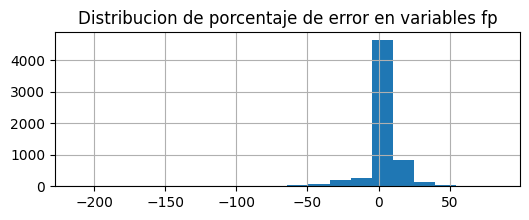

In [37]:
fp_er.hist(bins=20, figsize=(6,2))
plt.title('Distribucion de porcentaje de error en variables fp')
plt.show()

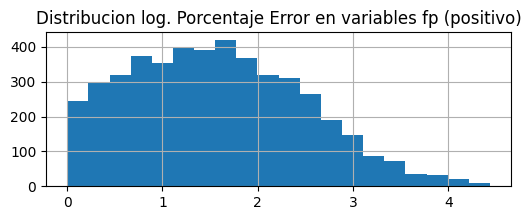

In [38]:
fp_er.loc[lambda x: x >= 1].apply(lambda x: np.log(x)).hist(bins=20, figsize=(6,2))
plt.title('Distribucion log. Porcentaje Error en variables fp (positivo)')
plt.show()

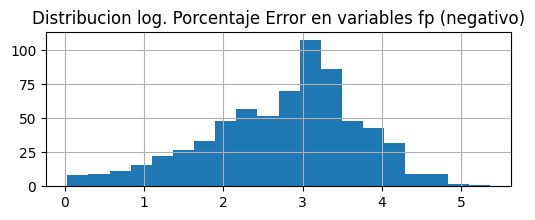

In [39]:
fp_er.loc[lambda x: x <= -1].apply(lambda x: np.log(-x)).hist(bins=20, figsize=(6,2))
plt.title('Distribucion log. Porcentaje Error en variables fp (negativo)')
plt.show()

El numero de incosistencias y la variedad de las misma es muy grande, por lo que prescindiremos de estas características para el resto del análisis

In [40]:
hog.drop(columns=['fp_contado', 'fp_credito', 'fp_especie', 'fp_prodprop', 'fp_tarjetas','fp_otras', 'fp_indef', 'fp_diff', 'fp_diff_perc'], inplace=True)

### save

In [ ]:
hog.to_csv('hog_dataset.csv', index=False)